# 4. Neural Networks with Numpy

In this notebook we will build our first neural network using only `numpy` as library.

We will work on the same dataset as last week and try to predict which digit is shown on the given pixel values. This time we load the dataset directly from sklearn using 28x28 pixels to show the digit.

In [2]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, data_home="./data", cache=True, parser='auto')

ModuleNotFoundError: No module named 'sklearn'

We know already from last time how the data looks:

In [ ]:
X.head(5)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


From the following histogram we see that the pixel values are between `0` and `255`.

<Axes: >

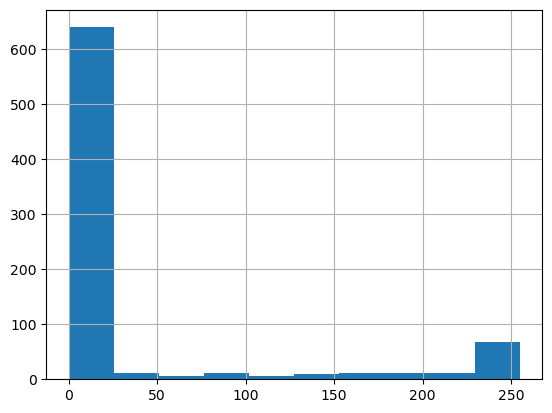

In [ ]:
X.iloc[0].hist()

The label is a number between 0-9 representing the digit shown on the pixels.

In [ ]:
y.head(3)

0    5
1    0
2    4
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

As we can see from above, the label is given as a digit. However, to calculate the loss function of the neural network, we need the label as a one-hot-encoded version, in which the true digit is encoded as `1` and the rest as `0`.

For instance:
- `3` -> `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`
- `9` -> `[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]`

This is done as follows:

In [ ]:
import pandas as pd
y_categorical = pd.get_dummies(y).astype('float32').values

Let's look at the first five lines to check:

In [ ]:
y_categorical[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

Before we start, we scale the data in the range [0,1] and divide it into train and test data:

In [ ]:
from sklearn.model_selection import train_test_split

X_scaled = (X/255).astype('float32').values
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.15, random_state=42)

## Task 1: Implement the Forward pass

We start with the following structure of a neural network with two hidden layers:
- Input layer of size 784 with sigmoid activation
- First hidden layer of size 128 with sigmoid activation
- Second hidden layer of size 64 with sigmoid activation
- Output layer of size 10 with softmax activation

A skeleton code for this network is given in the following class. Your first task is to complete the method `forward_pass` to calculate the forward pass on __one__ data point. Below this cell you can find a test to check whether your implementation is correct. Also see the hint below.

In [ ]:
import time
import numpy as np

class DeepNeuralNetwork():
    
    # do not touch this method
    def __init__(self):
        
        # initialize weights randomly
        np.random.seed(0)
        self.w1 = np.random.randn(128, 784)
        self.w2 = np.random.randn(64, 128)
        self.w3 = np.random.randn(10, 64)

    def forward_pass(self, x_train):
        z1 = np.dot(self.w1, x_train)
        a1 = 1 / (1 + np.exp(-z1))
        z2 = np.dot(self.w2, a1)
        a2 = 1 / (1 + np.exp(-z2))
        z3 = np.dot(self.w3, a2)
        exps = np.exp(z3 - np.max(z3))
        a3 = exps / np.sum(exps)
        
        # we need to remember all values for the gradient calculation, don't touch this
        self.fwdpass = [x_train, z1, a1, z2, a2, z3, a3]
        
        return a3
    
    # do not touch this method
    def get_gradients(self, y, y_hat):
        # restore values from foward pass
        a0, z1, a1, z2, a2, z3, a3 = self.fwdpass
        
        # Calculate W3 update
        exps = np.exp(z3 - z3.max())
        softmax_derivative = exps / np.sum(exps, axis=0) * (1 - exps / np.sum(exps, axis=0))
        error = 2 * (y_hat - y) / y_hat.shape[0] * softmax_derivative
        gradient_w3 = np.outer(error, a2)

        # Calculate W2 update
        sigmoid_derivative = (np.exp(-z2))/((np.exp(-z2)+1)**2)
        error = np.dot(self.w3.T, error) * sigmoid_derivative
        gradient_w2 = np.outer(error, a1)

        # Calculate W1 update
        sigmoid_derivative = (np.exp(-z1))/((np.exp(-z1)+1)**2)
        error = np.dot(self.w2.T, error) * sigmoid_derivative
        gradient_w1 = np.outer(error, a0)

        return [gradient_w1, gradient_w2, gradient_w3]

ModuleNotFoundError: No module named 'numpy'

Hint: To calculate the ouput of a layer you can use numpys matrix operations, as we have seen it in the lecture slides.
For instance:

In [ ]:
import numpy as np

w = np.array([[2,2,2],[1,1,1]])
print(w)
print(w.shape)
x = np.array([3, 4, 5])
print(x.shape)

z = np.dot(w, x)
z

In [ ]:
# Test for task 1:
dnn = DeepNeuralNetwork()

# the network outputs a probability for every neuron in the last layer
y_hat = dnn.forward_pass(X_train[0])
print("The output of the last layer looks like this:\n", y_hat)

# to check if the network works correctly, check if the following condition is True
abs(y_hat[8] - 0.946) < 0.001

### Task 2: Implement  the training procedure

We can now start training the network by implementing the training procedure. We train the network for 10 epochs as shown in the code below.
In each epoch we go over every data point `x` in `X_train` and:
1. Calculate a forward pass on `x` and save it as `y_hat`. Use the `forward_pass` method that you implemeneted in the previous task.
2. Calculate the gradients for the weight in w1, w2 and w3 using the `get_gradient` function of the network
3. Update the weights `w1`, `w2` and `w3` of the network by moving into the negative direction of the gradient multiplied with the `learning_rate`
4. Bonus: Calculate the cross-entropy-loss after each epoch and plot it in relation to the epochs.



In [ ]:
dnn = DeepNeuralNetwork()

no_epochs = 10
learning_rate = 0.01

start_time = time.time()
losses = []
for iteration in range(no_epochs):
    # calc forward pass on x, save as y_hat use forward_pass method
    y_hat = dnn.forward_pass(X_train[0])

    # calc gradients for w1, w2, w3 use get_gradients method
    gradients = dnn.get_gradients(y_train[0], y_hat)

    # update weights w1, w2, w3 using the gradients and learning rate
    dnn.w1 -= learning_rate * gradients[0]
    dnn.w2 -= learning_rate * gradients[1]
    dnn.w3 -= learning_rate * gradients[2]

    # calc cross entropy loss after each epoch and plot in relation to epoch
    loss = -np.sum(y_train[0] * np.log(y_hat))
    losses.append(loss)
    print("Epoch: ", iteration, "Loss: ", loss)
    

### Task 3: Predict on the test data

After the network is trained, we can use it to predict on the test data.

Task: 
- Iterate over the test data and use the trained network the predict on every test data point.
- Identify the index of the neuron which returned the highest probability.
- Compare this value to the true label in the test data.
- Compute the accuracy.

In [ ]:
# Iterate over the test data and use the trained network the predict on every test data point.
correct_predictions = 0

for i in range(len(X_test)):
    y_hat = dnn.forward_pass(X_test[i])
    predicted_label = np.argmax(y_hat)
    true_label = np.argmax(y_test[i])
    if predicted_label == true_label:
        correct_predictions += 1

accuracy = correct_predictions / len(X_test)
print("Accuracy on test data:", accuracy)

# Identify the index of the neuron which returned the highest probability.
highest_probability_index = np.argmax(y_hat)
print("Index of the neuron with the highest probability:", highest_probability_index)

# Compare this value to the true label in the test data.
print("True label:", true_label)
print("Predicted label:", predicted_label)

# Compute the accuracy.
accuracy = correct_predictions / len(X_test)
print("Accuracy on test data:", accuracy)
import matplotlib.pyplot as plt
plt.plot(losses)
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Bonus Task:
- Remove the first hidden layer. Train the network and check the performance on the test data.